*   Proyecto final de Ciencia de Datos para Biodiversidad.
*   TEC de Costa Rica
*   Alumno: José Renato Morales Mérida.






In [4]:
#cargar librerias
import pandas as pd
import numpy as np

#cargar los datos de iNaturalist
df=pd.read_csv('Observaciones_reptiles.csv')

#obtener las columnas que necesito
df.columns
headers=['id','observed_on','place_guess', 'latitude', 'longitude', 'public_positional_accuracy', 'scientific_name', 'common_name', 'taxon_id']
df2=df[headers]
df2.columns
df2

,id,observed_on,place_guess,latitude,longitude,public_positional_accuracy,scientific_name,common_name,taxon_id
0,109875,1982-08-25,lake atitlan guatemala,14.711115,-91.130668,NaN,Senticolis triaspis mutabilis,NaN,28715
1,109885,2002-11-23,los amates izabal guatemala,15.317512,-89.285039,NaN,Boa imperator,Mazacuata,539399
2,172260,2007-12-31,"outside Cueva Actun Kan, Santa Elena, Peten, G...",16.901677,-89.896016,407.0,Anolis rodriguezii,anolis liso del sureste,539334
3,172263,2008-01-01,"Zacatan, Las Guacamayas, Hidroelectrica Pasabi...",15.024366,-89.692038,2016.0,Sceloporus variabilis,Lagartija espinosa vientre rosado,36145
4,226473,2013-03-10,"ChiQUIMULLIA, GUATEMALLA.",14.074310,-90.373363,1822.0,Sceloporus,Lagartijas espinosas,36141
...,...,...,...,...,...,...,...,...,...
4814,220246607,2024-06-02,"Los Amates, Guatemala",15.268990,-89.040694,8.0,Ctenosaura similis,Iguana negra de cola espinosa,35303
4815,220259986,2024-06-02,"12 Avenida, Guatemala City, Guatemala, GT",14.603292,-90.585961,170.0,Scincella,Salamanquesas,37647
4816,220276429,2024-06-03,Guatemala,14.572137,-90.783269,30954.0,Pituophis lineaticollis,cincuate sureño,64089
4817,220323750,2024-06-03,"267Q+GQ2, San Roman, Guatemala",17.013204,-89.760796,2077.0,Crocodylus moreletii,Cocodrilo de pantano,26074


In [5]:
#Quitar los datos historicos, iNaturalist fue lanzado en 2008 y me interesan los datos desde la aplicación
df3=df2[df['observed_on']>= '2008']

df3




,id,observed_on,place_guess,latitude,longitude,public_positional_accuracy,scientific_name,common_name,taxon_id
3,172263,2008-01-01,"Zacatan, Las Guacamayas, Hidroelectrica Pasabi...",15.024366,-89.692038,2016.0,Sceloporus variabilis,Lagartija espinosa vientre rosado,36145
4,226473,2013-03-10,"ChiQUIMULLIA, GUATEMALLA.",14.074310,-90.373363,1822.0,Sceloporus,Lagartijas espinosas,36141
5,226476,2013-03-11,"Chiquimullia, Guatemalla",14.084051,-90.373878,NaN,Hemidactylus frenatus,Besucona asiática,51940
6,226480,2013-03-12,"Chiquimullia, Guatemalla",14.054360,-90.352005,NaN,Iguana iguana,Iguana verde,35342
7,226489,2013-03-13,"Chiquimullia, Guatemalla",14.083333,-90.383333,1822.0,Ctenosaura similis,Iguana negra de cola espinosa,35303
...,...,...,...,...,...,...,...,...,...
4814,220246607,2024-06-02,"Los Amates, Guatemala",15.268990,-89.040694,8.0,Ctenosaura similis,Iguana negra de cola espinosa,35303
4815,220259986,2024-06-02,"12 Avenida, Guatemala City, Guatemala, GT",14.603292,-90.585961,170.0,Scincella,Salamanquesas,37647
4816,220276429,2024-06-03,Guatemala,14.572137,-90.783269,30954.0,Pituophis lineaticollis,cincuate sureño,64089
4817,220323750,2024-06-03,"267Q+GQ2, San Roman, Guatemala",17.013204,-89.760796,2077.0,Crocodylus moreletii,Cocodrilo de pantano,26074


In [6]:
#Ahora quiero explorar los datos en el tiempo que me interesan
#Voy a utilizar ydata-profiling
!pip install ydata-profiling
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=f242cd763e29fb5aec7e4c25580359e417be300a1fc2ffa88717474a33418519
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [7]:
#importamos las librerias
from sklearn import datasets
from ydata_profiling import ProfileReport

In [11]:
#creamos el perfil
perfil= ProfileReport(df3, title='Informe de registros de reptiles iNaturalist', explorative=True )

#mostramos el reporte en un notebook
perfil.to_notebook_iframe()

#crear el html
perfil.to_file("reporte del perfil.html")

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-8-c8f6128f4dbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['observed_on']=pd.to_datetime(df3['observed_on'])


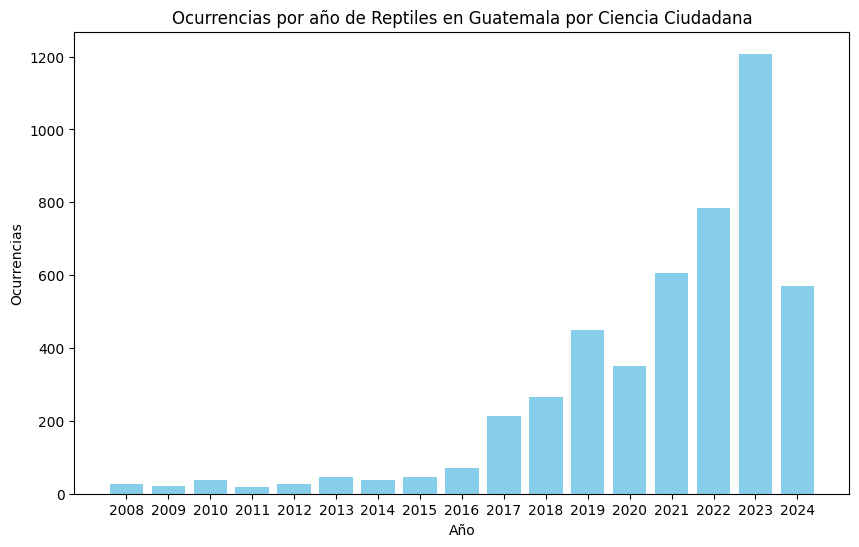

In [8]:
#hago un histograma para observar en que año se ha observado mayor cantidad de reptiles
import matplotlib.pyplot as plt

#que las fechas esten en formato datetime

df3['observed_on']=pd.to_datetime(df3['observed_on'])
#Contar cuantas ocurrencias hay por año
df4=df3.groupby(df3['observed_on'].dt.year).size().reset_index(name='Ocurrencias')
df4

#Generar un gráfico de barras para observar las ocurrencias por año
#tamaño del gráfico
plt.figure(figsize=(10,6))
plt.bar(df4['observed_on'], df4['Ocurrencias'], color= 'skyblue')
#que se muestren todos los años
plt.xticks(df4['observed_on'])
#Título del gráfico
plt.title('Ocurrencias por año de Reptiles en Guatemala por Ciencia Ciudadana')
#etiqueta del eje Y
plt.ylabel('Ocurrencias')
#etiqueta del eje X
plt.xlabel('Año')

plt.show()


In [9]:
#Obtener que sitios poseen el mayor avistamiento de Reptiles por ciencia Ciudadana
#cargamos las librerias
!pip install geodatasets
!pip install geopy
import geopandas as gpd
import geodatasets
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [39]:
#obtener los años de mayor avistamiento
df5=df3[df3['observed_on']>="2021"]
df5.head()

#crear el df como geodataframe
df6=gpd.GeoDataFrame(df5, geometry=gpd.points_from_xy(df5.longitude, df5.latitude))

#observar si hay datos vacios
print(df6[['latitude','longitude']].isnull().sum())
print(df6['geometry'].isnull().sum())
df6.head()


latitude     0
longitude    0
dtype: int64
0


,id,observed_on,place_guess,latitude,longitude,public_positional_accuracy,scientific_name,common_name,taxon_id,geometry
1164,67411816,2021-01-01,"Mixco, Guatemala, GT",14.628070,-90.639555,5.0,Geophis rhodogaster,culebra minadora guatemalteca,30025,POINT (-90.63956 14.62807)
1165,67487855,2021-01-02,"Villa Nueva, Guatemala",14.557899,-90.576820,NaN,Rhinoclemmys pulcherrima,Tortuga de monte pintada,39932,POINT (-90.57682 14.55790)
1168,67827378,2021-01-09,"Ciudad de Guatemala, Guatemala, GT",14.690238,-90.490670,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.49067 14.69024)
1169,67992336,2021-01-09,"Iztapa, Escuintla, GT",13.929196,-90.700783,91.0,Ctenosaura similis,Iguana negra de cola espinosa,35303,POINT (-90.70078 13.92920)
1170,68091548,2021-01-14,"Ciudad de Guatemala, Guatemala, GT",14.690162,-90.490372,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.49037 14.69016)


In [29]:
# iniciar Nominatim API
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoPandas")
def get_muni(p):
    location = geolocator.geocode(f"{p.y},{p.x}")
    if location:
        return location.address
    else:
        return None

df6['Municipio'] = df6['geometry'].map(lambda p: get_muni(p))
df6.head()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,observed_on,place_guess,latitude,longitude,public_positional_accuracy,scientific_name,common_name,taxon_id,geometry,location,Municipio
3,172263,2008-01-01,"Zacatan, Las Guacamayas, Hidroelectrica Pasabi...",15.024366,-89.692038,2016.0,Sceloporus variabilis,Lagartija espinosa vientre rosado,36145,POINT (-89.69204 15.02437),"15.0243658035, -89.6920378288","Santa Cruz, Río Hondo, Zacapa, 19005, Guatemala"
4,226473,2013-03-10,"ChiQUIMULLIA, GUATEMALLA.",14.074310,-90.373363,1822.0,Sceloporus,Lagartijas espinosas,36141,POINT (-90.37336 14.07431),"14.0743100434, -90.3733634949","Chiquimulilla, Santa Rosa, 06008, Guatemala"
5,226476,2013-03-11,"Chiquimullia, Guatemalla",14.084051,-90.373878,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.37388 14.08405),"14.0840505713, -90.373878479","San Antonio Los Tamarindos, Chiquimulilla, San..."
6,226480,2013-03-12,"Chiquimullia, Guatemalla",14.054360,-90.352005,NaN,Iguana iguana,Iguana verde,35342,POINT (-90.35201 14.05436),"14.0543601638, -90.3520050987",Carretera Chiquimulilla - Ciudad Pedro de Alva...
7,226489,2013-03-13,"Chiquimullia, Guatemalla",14.083333,-90.383333,1822.0,Ctenosaura similis,Iguana negra de cola espinosa,35303,POINT (-90.38333 14.08333),"14.0833333, -90.3833333","Chiquimulilla, Santa Rosa, 06008, Guatemala"


In [50]:
df6['Municipio']=df6['Municipio'].str.split(',').str[-4]
df6.head()

,id,observed_on,place_guess,latitude,longitude,public_positional_accuracy,scientific_name,common_name,taxon_id,geometry,Municipio
1164,67411816,2021-01-01,"Mixco, Guatemala, GT",14.628070,-90.639555,5.0,Geophis rhodogaster,culebra minadora guatemalteca,30025,POINT (-90.63956 14.62807),San Lucas Sacatepéquez
1165,67487855,2021-01-02,"Villa Nueva, Guatemala",14.557899,-90.576820,NaN,Rhinoclemmys pulcherrima,Tortuga de monte pintada,39932,POINT (-90.57682 14.55790),Villa Nueva
1168,67827378,2021-01-09,"Ciudad de Guatemala, Guatemala, GT",14.690238,-90.490670,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.49067 14.69024),Chinautla
1169,67992336,2021-01-09,"Iztapa, Escuintla, GT",13.929196,-90.700783,91.0,Ctenosaura similis,Iguana negra de cola espinosa,35303,POINT (-90.70078 13.92920),NaN
1170,68091548,2021-01-14,"Ciudad de Guatemala, Guatemala, GT",14.690162,-90.490372,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.49037 14.69016),Chinautla


In [51]:
df7=df6.dropna(subset=['Municipio'])
df7

,id,observed_on,place_guess,latitude,longitude,public_positional_accuracy,scientific_name,common_name,taxon_id,geometry,Municipio
1164,67411816,2021-01-01,"Mixco, Guatemala, GT",14.628070,-90.639555,5.0,Geophis rhodogaster,culebra minadora guatemalteca,30025,POINT (-90.63956 14.62807),San Lucas Sacatepéquez
1165,67487855,2021-01-02,"Villa Nueva, Guatemala",14.557899,-90.576820,NaN,Rhinoclemmys pulcherrima,Tortuga de monte pintada,39932,POINT (-90.57682 14.55790),Villa Nueva
1168,67827378,2021-01-09,"Ciudad de Guatemala, Guatemala, GT",14.690238,-90.490670,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.49067 14.69024),Chinautla
1170,68091548,2021-01-14,"Ciudad de Guatemala, Guatemala, GT",14.690162,-90.490372,NaN,Hemidactylus frenatus,Besucona asiática,51940,POINT (-90.49037 14.69016),Chinautla
1171,68138248,2021-01-15,"Flores, Guatemala",16.916006,-89.852094,31.0,Crocodylus moreletii,Cocodrilo de pantano,26074,POINT (-89.85209 16.91601),Flores
...,...,...,...,...,...,...,...,...,...,...,...
4814,220246607,2024-06-02,"Los Amates, Guatemala",15.268990,-89.040694,8.0,Ctenosaura similis,Iguana negra de cola espinosa,35303,POINT (-89.04069 15.26899),Finca Quirigua D.M.
4815,220259986,2024-06-02,"12 Avenida, Guatemala City, Guatemala, GT",14.603292,-90.585961,170.0,Scincella,Salamanquesas,37647,POINT (-90.58596 14.60329),Zona 8
4816,220276429,2024-06-03,Guatemala,14.572137,-90.783269,30954.0,Pituophis lineaticollis,cincuate sureño,64089,POINT (-90.78327 14.57214),Antigua Guatemala
4817,220323750,2024-06-03,"267Q+GQ2, San Roman, Guatemala",17.013204,-89.760796,2077.0,Crocodylus moreletii,Cocodrilo de pantano,26074,POINT (-89.76080 17.01320),Jobompiche


<Axes: title={'center': 'Concentración de Avistamientos de Reptiles en Guatemala por Ciencia Ciudadana (2021-2024)'}, xlabel='Longitud', ylabel='Latitud'>

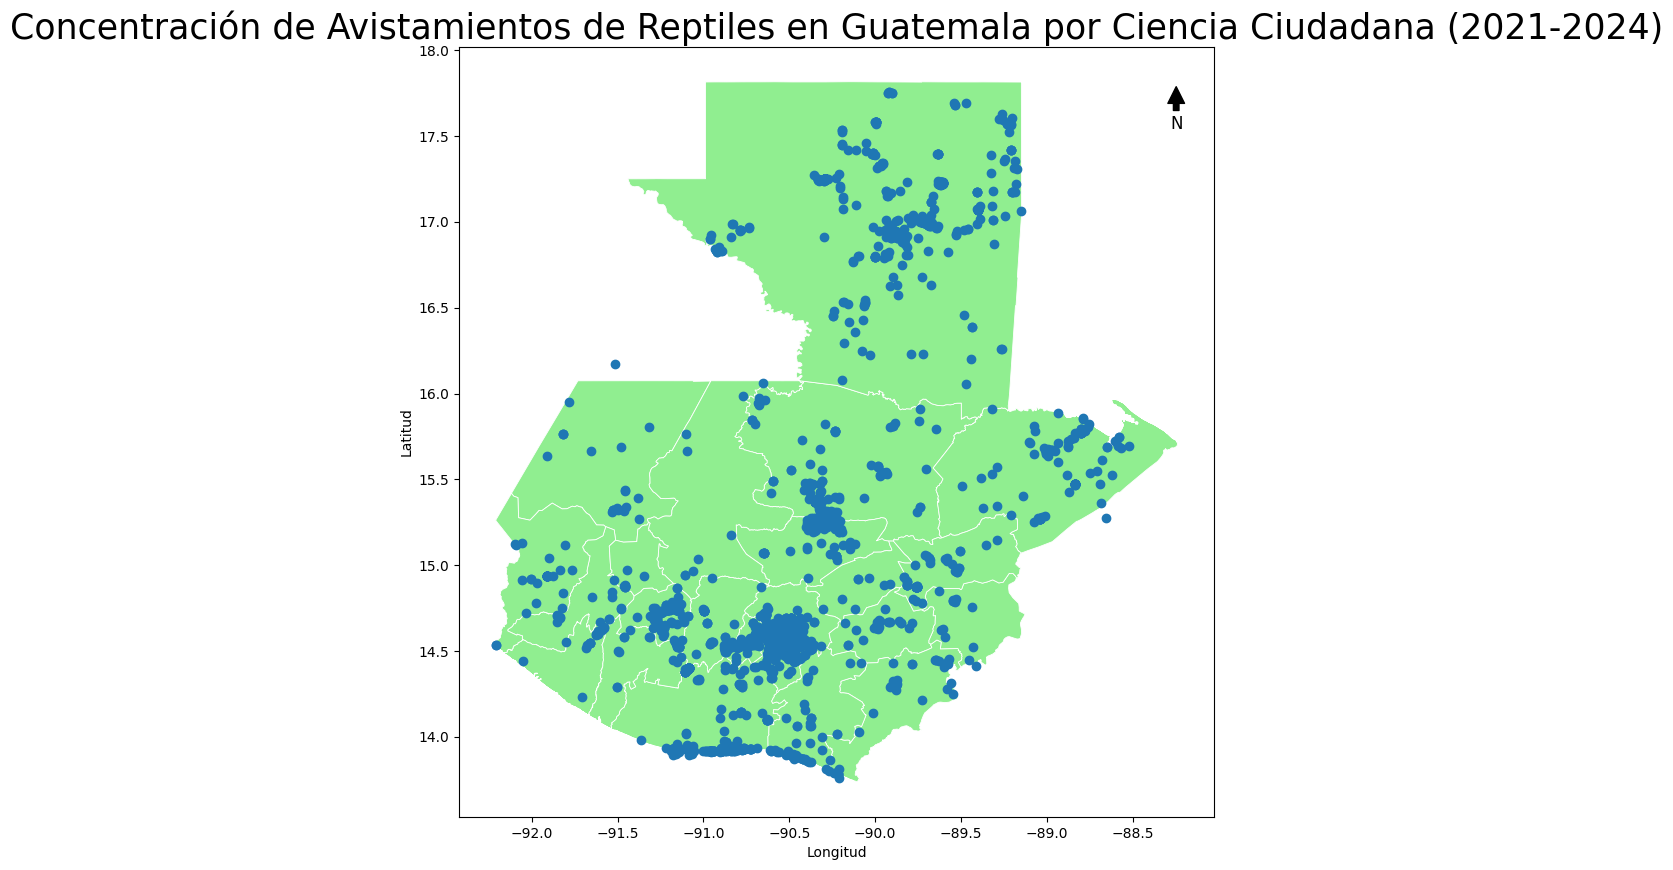

In [65]:
#hacer mapa
mapa= gpd.read_file('gadm41_GTM_1.shp')

#plotear mapa
lienzo=mapa.plot(
    figsize=(10,10),
    color='lightgreen',
    edgecolor='w',
    linewidth= 0.6,
)

#asignar título
title= f'Concentración de Avistamientos de Reptiles en Guatemala por Ciencia Ciudadana (2021-2024)'
lienzo.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

#etiquetas
lienzo.set_ylabel('Latitud')
lienzo.set_xlabel('Longitud')

# Agregar cruz del Norte
north_arrow_x = 0.95
north_arrow_y = 0.95
lienzo.annotate('N', xy=(north_arrow_x, north_arrow_y), xytext=(north_arrow_x, north_arrow_y-0.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', va='center', fontsize=12, xycoords=lienzo.transAxes)
#generar mapa
df7.plot(ax=lienzo)
